# **Handling Imbalanced Dataset**

In simple terms, in binary classifiers , ``Imbalance of data is dominance of one class`` over other of **target variable**.

Class Imbalance occurs in datasets pertaining multiclass classification as well.

Imbalance datasets are characterized by a rare class, which represents a small portion of the entire population (1 out of 1000 or 1 out of 10000 or even more). Class imbalance can be intrinsic to the problem, it is imbalanced by its own nature, or it can be determined by the limitation of data collection, caused by economic or privacy reasons.

The minority class is scarce and its own characteristics and own patterns are scarce as well, but those information is extremely important for the trained model to discriminate the small samples from the crowd. 

<hr>

In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes. As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. This problem is prevalent in examples such as Fraud Detection, Anomaly Detection, Facial recognition etc.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

**Example**
- User churn in telecom industry.
- Detection of rare diseases.
- Detecting Credit card Fradulant transactions.

In above examples you can notice that number of data points of right class are very less as compared to other.

<hr>

### **Balanced Data**

<img src = 'a_img.png'>

### **Imbalanced Data**

<img src = 'b_img.png'>

Suppose to train a machine learning model to discern non-spam emails from spam emails. The entire dataset is composed of 44 emails, including 40 non-spam emails and 4 spam emails. The model used is a standard algorithm and doesn’t take into account the class distribution. The result achieved is the following:

<img src = 'f_img.png'>

In [2]:
TP = 0
TN = 40
FP = 0
FN = 4

AKURASI = (TP + TN) / 44
AKURASI*100

90.9090909090909

In [7]:
# PRESISI_POS = TP / (TP + FP) = 0
PRESISI_NEG = TN / (TN + FN)
PRESISI_NEG*100

90.9090909090909

In [8]:
# RECALL_POS = TP / (TP + FN) = 0
RECALL_NEG = TN / (TN + FP)
RECALL_NEG

1.0

The model obtains 90.9% of accuracy. Great result! But is it a good model? Obviously not! The model acts like a Zero Rule model: only the majority class is found, while the rare class, that is more interesting, is ignored.

Accuracy evaluates all the classes as equally important and that’s why it can’t be used as measure of goodness for models working on imbalanced class dataset.
Other metrics are necessary, such as:

-    Recall
-    Precision
-    F1 Measure
-    ROC curve and AUC

Which one is better? There isn’t a better metric. It depends on many factors, such as the goal, the context, and the cost function: is it better to classify correctly one more unit of the rare class but, at the same time, increasing False Positive errors (classify no-spam email as spam email), or misclassify some units of the rare class, but decreasing False Positive errors?

<hr>

# **``Ways to Handle Imbalance Target``**

### **1. Change Another Algorithm & Model ML**
### **2. Change Metrics**
### **3. Re-sampling techniques**
📌 **Natural Resampling**: the main goal is to collect more data of the minority class. It’s simple to obtain, but it’s not always possible. In dataset where the imbalance problem is part of its own nature, it’s hard to collect as data as the majority class.

📌 **Artificial Resampling**: it can be accomplished by:

-    **Undersampling**, by reducing data of the majority class
-    **Oversampling**, by replicating the minority class
-    **SMOTE** (Synthetic Minority Oversampling TEchnique). It is a synthetic minority oversampling technique, which makes synthetic data points by finding the nearest neighbours to each minority sample.
- **NearMiss Algorithm** is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. 


In re-sampling of data either we reduce the proportion of dominant class which is under-sampling or we increase proportion of minority class which is called as oversampling. However most successful approaches uses both oversampling and under-sampling together.

<hr>

# **``Under-sampling``**
Undersampling can cut out some important and valuable information from the dataset. To overcome the loss of information caused by undersampling, a cluster-based undersampling approach can applied. It uses the k-means alghoritm: the clusters created have the smaller variance within and the most between-class variance, thus the records inside the cluster share the same characteristics. The majority class is undersampled by taking only the centroids of the clusters created.

<img src = 'c_img.png'>

### **a) Random Under-sampling**

Random under-sampling is very simple and intuitive under- sampling technique . Method works by ``randomly choosing`` nbjmi the samples from dominant class.

There are two major drawbacks of these technique:

1. Major drawback of this technique is that we eliminate samples randomly, which may lead to loss of potential information .

2. The purpose of machine learning is for the classifier to estimate the probability distribution of the target population. Since that distribution is unknown we try to estimate the population distribution using a sample distribution. Statistics tells us that as long as the sample is drawn randomly, the sample distribution can be used to estimate the population distribution from where it was drawn.

### **b) Cluster Centroid Under-sampling**
Clusters of majority class and ``replace that cluster with centroid of that cluster``. So we undersample majority class by forming clusters and replacing it with cluster centroids.

For example:
- Majority class : 100 samples
- Minority class : 10 samples

Here , in this case we can form 10 clusters of majority class and replace 100 points with 10 data points i.e by cluster centroid.

### **c) Under-sampling using Tomek links**

Tomek link pair has two opposite class data points who are their own nearest neighbors. Main idea is to separate minority and majority class.

Suppose,
- d(A,B) : distance between two data points A & B
- Then, a(A,B) is Tomek link if and only if
- There is no such point ‘C’ , such that, d(A,C) < d(A<B) or d(B,C) < d(A,B)

If pair of samples form tomek link then either one of the sample is noise or both are placed at border.

As under-sampling technique we eliminate majority class point, while as part of data mining we eliminate both points.

### **d) NearMiss Algorithm**

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.

To prevent problem of information loss in most under-sampling techniques, ``near-neighbor methods`` are widely used.

The basic intuition about the working of near-neighbor methods is as follows:
- **Step 1**: The method first finds the distances between all instances of the majority class and the instances of the minority class. Here, majority class is to be under-sampled.

- **Step 2**: Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.

- **Step 3**: If there are k instances in the minority class, the nearest method will result in k*n instances of the majority class.

For finding n closest instances in the majority class, there are several variations of applying NearMiss Algorithm :

-    NearMiss – Version 1 : It selects samples of the majority class for which average distances to the k closest instances of the minority class is smallest.
-    NearMiss – Version 2 : It selects samples of the majority class for which average distances to the k farthest instances of the minority class is smallest.
-    NearMiss – Version 3 : It works in 2 steps. Firstly, for each minority class instance, their M nearest-neighbors will be stored. Then finally, the majority class instances are selected for which the average distance to the N nearest-neighbors is the largest.

<hr>

# **``Over-sampling``**
Oversampling, on the other hand, can lead to overfitting. Although, it’s been proved that adjusting the class distribution to the optimal one can improve drastically the performance, but find the best distribution is really difficult. Some dataset are more reactable to fully balanced distribution class, other instead gets greater performance with less skewed dataset. The researcher should find the better solution by trial and error and some heuristics

<img src = 'd_img.png'>

### **a) Random Oversampling**

In random oversampling technique we replace the samples with existing minority samples. In simple terms we can say that we just do multiplication of existing Minority class. Major drawback of this technique us that, this technique is highly prone to over fitting.

### **b) SMOTE (Synthetic Minority Oversampling Technique)**

In this technique we calculate difference between sample under consideration and its nearest neighbors. Once the distance is calculated we multiply that with the number between 0 and 1. We add it to sample under consideration. Which gives us new sample point for minority class. Depending upon the amount of oversampling required, neighbours from k-NN are randomly chosen.

<img src = 'e_img.png'>

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

<hr>

# **``Credit Card Dataset``**

**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. ``The dataset is highly unbalanced``, the ``positive class (1)`` (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [9]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

# untuk undersampling & oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [10]:
df = pd.read_csv('creditcard.csv')

In [12]:
df.head(3).T

,0,1,2
Time,0.000000,0.000000,1.000000
V1,-1.359807,1.191857,-1.358354
V2,-0.072781,0.266151,-1.340163
V3,2.536347,0.166480,1.773209
V4,1.378155,0.448154,0.379780
V5,-0.338321,0.060018,-0.503198
V6,0.462388,-0.082361,1.800499
V7,0.239599,-0.078803,0.791461
V8,0.098698,0.085102,0.247676
V9,0.363787,-0.255425,-1.514654


In [13]:
# check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

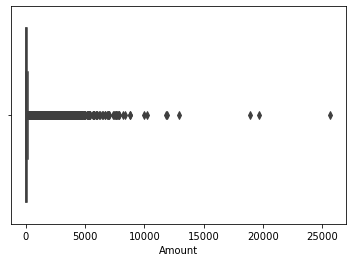

In [14]:
sns.boxplot(df['Amount'])

In [15]:
# scalling 'Amount' Feature
df['Amount_scl'] = RobustScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [16]:
# hapus 'Time' dan 'Amount' (tidak relevan)
df = df.drop(['Time', 'Amount'], axis = 1)

### **Check Target Proportion**

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
x = [round(i/len(df)*100, 2) for i in df['Class'].value_counts()]
pd.DataFrame(data=x, index=['Non Fraud', 'Fraud'], columns=['Data (%)'])

,Data (%)
Non Fraud,99.83
Fraud,0.17


**Note**:
- Tidak ada feature selection
- Tidak handling outlier -> diabaikan

### __Splitting Dataset__

In [22]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
# jumlah data transaksi sebelum di-resampling
print('Jumlah transaksi x_train', x_train.shape)
print('Jumlah transaksi x_test', x_test.shape)
print('Jumlah transaksi y_train', y_train.shape)
print('Jumlah transaksi y_test', y_test.shape)

Jumlah transaksi x_train (227845, 29)
Jumlah transaksi x_test (56962, 29)
Jumlah transaksi y_train (227845,)
Jumlah transaksi y_test (56962,)


### __Fitting Model__

In [26]:
# Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

C:\Users\SONY Z\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = model_LR.predict(x_test)

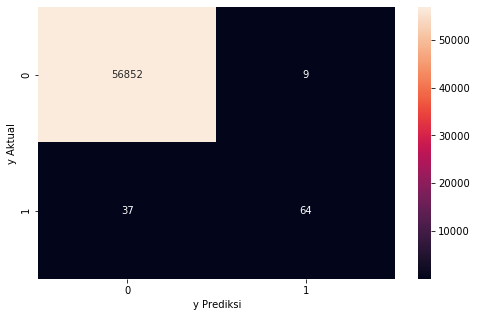

In [28]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                    precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                     f1_score(y_test, y_pred)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,99.919244
recall,63.366337
precision,87.671233
roc_auc_score,81.675254
f1_score,73.563218


In [33]:
pd.DataFrame(data = [model_LR.score(x_train, y_train)*100,
                     model_LR.score(x_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,99.918804
Model Score in Data Test,99.919244


<hr>

# Handling Imbalance Target
## **A. Oversampling using ``SMOTE``**

SMOTE Algorithm has oversampled the minority instances and ``made it equal to majority class``. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.

In [36]:
print('Jumlah transaksi x_train sebelum Oversampling', x_train.shape)
print('Jumlah transaksi y_train sebelum Oversampling', y_train.shape, '\n')

print("Jumlah label '1' sebelum Oversampling", sum(y_train == 1))
print("Jumlah label '0' sebelum Oversampling", sum(y_train == 0))

Jumlah transaksi x_train sebelum Oversampling (227845, 29)
Jumlah transaksi y_train sebelum Oversampling (227845,) 

Jumlah label '1' sebelum Oversampling 391
Jumlah label '0' sebelum Oversampling 227454


In [37]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [47]:
print('Jumlah transaksi x_train setelah Oversampling', x_train_sm.shape)
print('Jumlah transaksi y_train setelah Oversampling', y_train_sm.shape, '\n')

print("Jumlah label '1' setelah Oversampling", sum(y_train_sm == 1))
print("Jumlah label '0' setelah Oversampling", sum(y_train_sm == 0))

Jumlah transaksi x_train setelah Oversampling (454908, 29)
Jumlah transaksi y_train setelah Oversampling (454908,) 

Jumlah label '1' setelah Oversampling 227454
Jumlah label '0' setelah Oversampling 227454


**Jumlah label '1' bertambah dari awalnya 391 menjadi sama dengan label 0 yaitu 227.454**

### __Performa Model setelah Oversampling__

In [40]:
# fitting model
model_LR_sm = LogisticRegression()
model_LR_sm.fit(x_train_sm, y_train_sm)

#prediksi
y_pred_sm = model_LR_sm.predict(x_test)

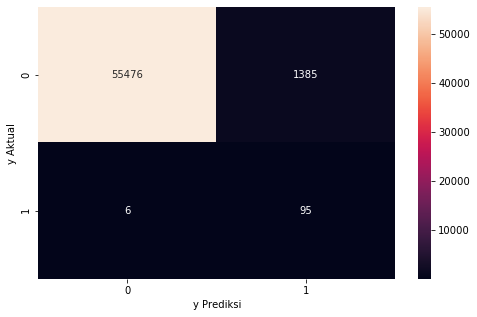

In [44]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [41]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [42]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_sm)*100, recall_score(y_test, y_pred_sm)*100,
                    precision_score(y_test, y_pred_sm)*100, roc_auc_score(y_test, y_pred_sm)*100,
                     f1_score(y_test, y_pred_sm)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,97.558021
recall,94.059406
precision,6.418919
roc_auc_score,95.811821
f1_score,12.017710


In [43]:
pd.DataFrame(data = [model_LR_sm.score(x_train, y_train)*100,
                     model_LR_sm.score(x_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,97.550528
Model Score in Data Test,97.558021


## **B. Undersampling using ``NearMiss``**

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.

The NearMiss Algorithm has undersampled the majority instances and made it equal to majority class. Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.

In [45]:
print('Jumlah transaksi x_train sebelum Undersampling', x_train.shape)
print('Jumlah transaksi y_train sebelum Undersampling', y_train.shape, '\n')

print("Jumlah label '1' sebelum Undersampling", sum(y_train == 1))
print("Jumlah label '0' sebelum Undersampling", sum(y_train == 0))

Jumlah transaksi x_train sebelum Undersampling (227845, 29)
Jumlah transaksi y_train sebelum Undersampling (227845,) 

Jumlah label '1' sebelum Undersampling 391
Jumlah label '0' sebelum Undersampling 227454


In [46]:
nm = NearMiss()
x_train_nm, y_train_nm = nm.fit_sample(x_train, y_train)

In [48]:
print('Jumlah transaksi x_train setelah Undersampling', x_train_nm.shape)
print('Jumlah transaksi y_train setelah Undersampling', y_train_nm.shape, '\n')

print("Jumlah label '1' setelah Undersampling", sum(y_train_nm == 1))
print("Jumlah label '0' setelah Undersampling", sum(y_train_nm == 0))

Jumlah transaksi x_train setelah Undersampling (782, 29)
Jumlah transaksi y_train setelah Undersampling (782,) 

Jumlah label '1' setelah Undersampling 391
Jumlah label '0' setelah Undersampling 391


**Jumlah label '0' bertambah dari awalnya 227454 menjadi sama dengan label 1 yaitu 391**

### __Performa Model setelah Undersampling__

In [49]:
# fitting model
model_LR_nm = LogisticRegression()
model_LR_nm.fit(x_train_nm, y_train_nm)

#prediksi
y_pred_nm = model_LR_nm.predict(x_test)

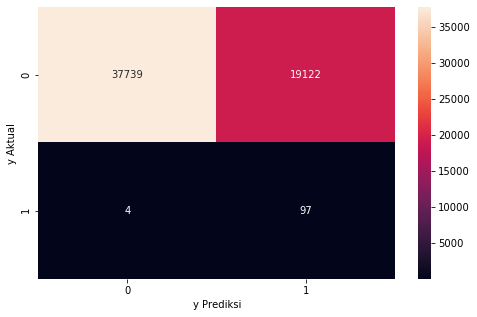

In [51]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_nm), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [52]:
print(classification_report(y_test, y_pred_nm))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80     56861
           1       0.01      0.96      0.01       101

    accuracy                           0.66     56962
   macro avg       0.50      0.81      0.40     56962
weighted avg       1.00      0.66      0.80     56962



In [53]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_nm)*100, recall_score(y_test, y_pred_nm)*100,
                    precision_score(y_test, y_pred_nm)*100, roc_auc_score(y_test, y_pred_nm)*100,
                     f1_score(y_test, y_pred_nm)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,66.423230
recall,96.039604
precision,0.504709
roc_auc_score,81.205114
f1_score,1.004141


In [54]:
pd.DataFrame(data = [model_LR_nm.score(x_train, y_train)*100,
                     model_LR_nm.score(x_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score (%)']
            )

,Score (%)
Model Score in Data Train,66.394698
Model Score in Data Test,66.423230


### __Conclusion__:
**``SMOTE is better to use in this case.``**

<hr>

## **Take Home/Class Exercise**

#### **1. Use these ML model to predict ``Credit Fraud`` in this dataset. Compare ``evaluation metric`` before & after re-sampling target:**
- Decision Tree Classifier
- Random Forest Classifier
- KNN Classifier

What's the best model based on __Precision & Recall Metric__?

####  **2. Apply hyperparameter tuning + after re-sampling target (SMOTE):**
- ``Kel A``: Logistic Regression 
- ``Kel B``: Decision Tree Classifier
- ``Kel C``: Random Forest Classifier

What's the best model based on __Precision & Recall Metric__?


<hr>

# **Reference**:
- Aditya Patil, "Dealing with Imbalance Data", https://medium.com/@patiladitya81295/dealing-with-imbalance-data-1bacc7d68dff
- Roberta Pollastro, "How to handle Class Imbalance Problem", https://medium.com/quantyca/how-to-handle-class-imbalance-problem-9ee3062f2499
- Baptiste Rocca, "Handling imbalanced datasets in machine learning", https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
- Geeksforgeeks, "ML | Handling Imbalanced Data with SMOTE and Near Miss Algorithm in Python", https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
- Rahul Agarwal, "The 5 most useful Techniques to Handle Imbalanced datasets", https://towardsdatascience.com/the-5-most-useful-techniques-to-handle-imbalanced-datasets-6cdba096d55a
- Dataset source: https://www.kaggle.com/mlg-ulb/creditcardfraud